# Data Importing 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ecom_data.csv')

In [3]:
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [6]:
data.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [7]:
data['tagText'] = data['tagText'].astype('category').cat.codes

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 19.5+ KB
None


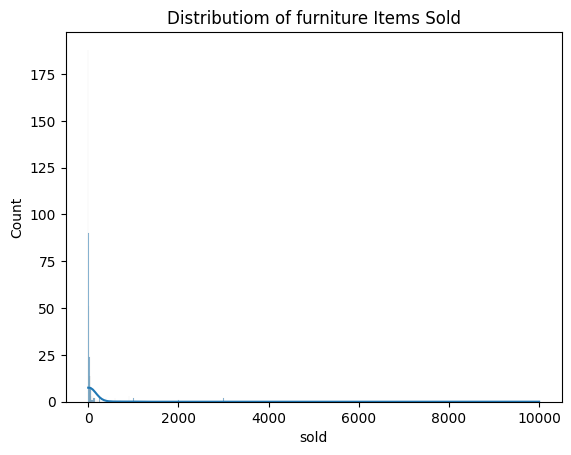

In [10]:
sns.histplot(data['sold'],kde=True)
plt.title('Distributiom of furniture Items Sold')
plt.show()

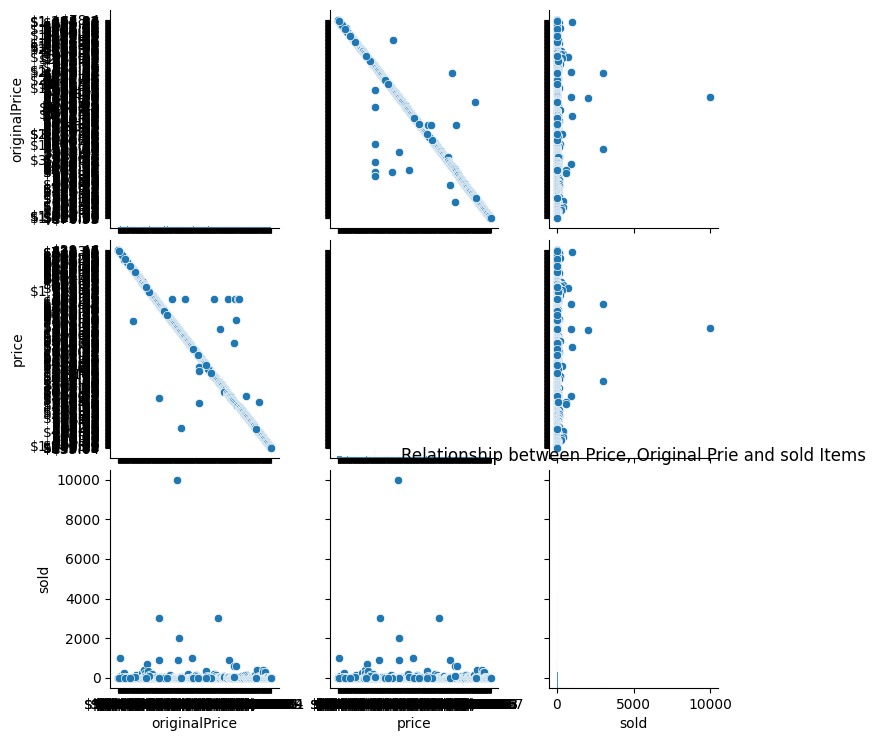

In [14]:
sns.pairplot(data,vars=['originalPrice','price','sold'],kind='scatter')
plt.title("Relationship between Price, Original Prie and sold Items")
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
data['originalPrice'] = pd.to_numeric(data['originalPrice'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')


In [23]:
data['disct_per'] = ((data['originalPrice'] - data['price']) / data['originalPrice']) * 100

In [24]:
tfidf = TfidfVectorizer(max_features=100)
prodt_title = tfidf.fit_transform(data['productTitle'])

In [27]:

prodt_title_df = pd.DataFrame(prodt_title.toarray())
df = pd.concat([data, prodt_title_df], axis=1)





In [26]:
type(prodt_title)

scipy.sparse._csr.csr_matrix

In [28]:
df = df.drop(['productTitle'], axis=1)

# Model training

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
x = df.drop('sold', axis=1)
y = df['sold']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [124]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [121]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

x.columns = x.columns.astype(str)



In [125]:
print(x_train.shape)
print(x_test.shape)


(701, 104)
(176, 104)


In [133]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)




In [134]:
lr_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:

x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)


In [43]:
#print(x_train.dtypes)
print(x_train.applymap(type).head())



        originalPrice            price          tagText        disct_per  \
1528  <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
477   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
361   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
462   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
1734  <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   

                    0                1                2                3  \
1528  <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
477   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
361   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
462   <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   
1734  <class 'float'>  <class 'float'>  <class 'float'>  <class 'float'>   

                    4                5  ...               90               91  \
1528 

C:\Users\priyanshu\AppData\Local\Temp\ipykernel_16188\761518929.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(x_train.applymap(type).head())


In [136]:
y_pred_lr = lr_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)    
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

In [137]:
print(f'Linear Regression MSE: {mse_lr},R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf},R2: {r2_rf}')

Linear Regression MSE: 80000.72316111828,R2: 0.017974956290585653
Random Forest MSE: 80363.58718409689,R2: 0.013520727079326167
